# Importing libraries


In [247]:
import pandas as pd
import numpy as np

from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [248]:
movies = pd.read_csv('./data/movies.csv') 
ratings = pd.read_csv('./data/ratings.csv') 
movies.head(10)
# ratings.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


# Display the ratings from users per movies

In [249]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')

# Check Null Entries 

In [250]:
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


# Fill Null Entries with 0

In [251]:
final_dataset.fillna( 0 ,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


Data is very spars, so many zeros. We will remove those movies that were rated by very few users and also remove those users who rated very few movies.

# Qet the number of users who voted for each movie, and the number of movies voted by each user

In [252]:
# we need only the rating, so we will get only the rating column
no_user_voted = ratings.groupby('movieId')['rating'].agg('count') # group the ratings by movieId and count the number of ratings for each movie
no_movies_voted = ratings.groupby('userId')['rating'].agg('count') # group the ratings by userId and count the number of ratings for each user

# Plotting the nb of users voted for each movie

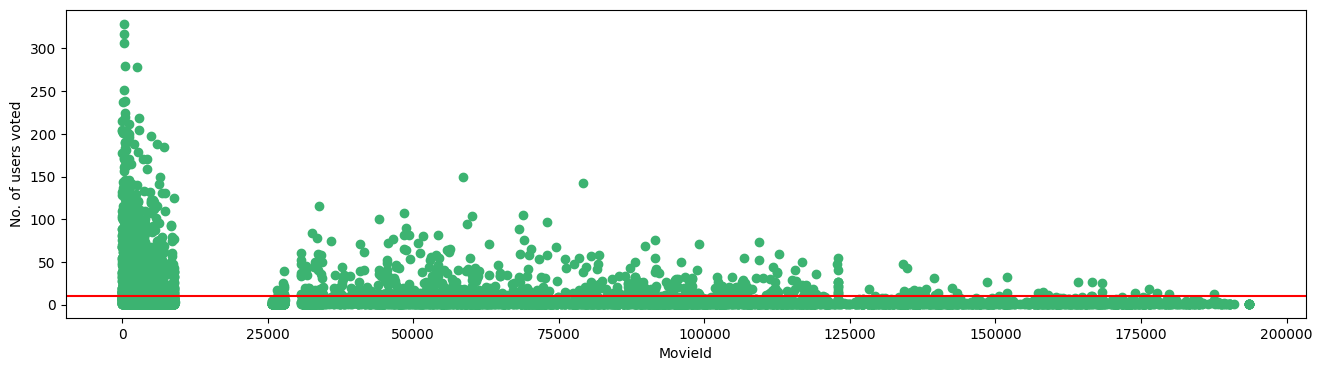

In [253]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_user_voted.index , no_user_voted, color='mediumseagreen') #scatter plot the number of users voted
plt.axhline(y=10,color='r') #add this line as a threshold
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

# Plotting the nb of movies voted by each user

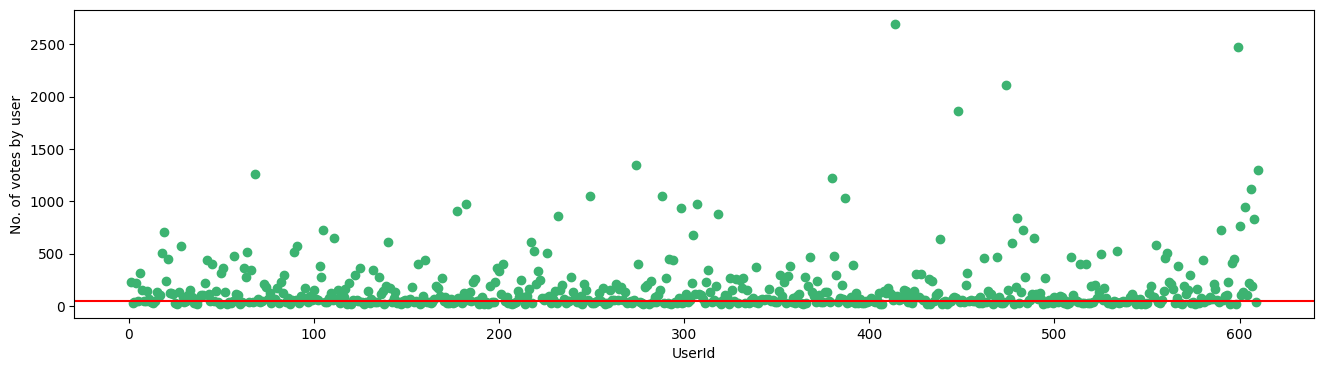

In [254]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index, no_movies_voted ,color='mediumseagreen') #scatter plot the number of movies 
plt.axhline(y=50,color='r') #this is the threshold of movies voted from users that voted more than 50 movies
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

# Qualify Movies (minimum 10 votes)

In [255]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted>10].index, :]

# Qualify Users (minimum 50 votes)

In [256]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted>50].index]
final_dataset

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Our final_dataset has dimensions of **2121 * 378** where most of the values are sparse. We have to Reduce the sparsity of the dataset to improve the efficiency of our recommendation system.

# Reducing the sparsity of the dataset

In [257]:
csr_ratings = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)
final_dataset


userId,movieId,1,4,6,7,10,11,15,16,17,...,600,601,602,603,604,605,606,607,608,610
0,1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
1,2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
2,3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
4,6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2117,176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2118,177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2119,179819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Align movies with the final dataset to include genres

In [258]:
movies_aligned = movies.set_index('movieId').loc[final_dataset['movieId']].reset_index()
movies_aligned

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller
...,...,...,...
2116,174055,Dunkirk (2017),Action|Drama|Thriller|War
2117,176371,Blade Runner 2049 (2017),Sci-Fi
2118,177765,Coco (2017),Adventure|Animation|Children
2119,179819,Star Wars: The Last Jedi (2017),Action|Adventure|Fantasy|Sci-Fi


# One hot encoding the genres

In [259]:
# Get all unique genres
all_genres = set()
for g in movies_aligned['genres']:
    all_genres.update(g.split('|'))
all_genres = list(all_genres)

# Create binary genre matrix
import numpy as np
genre_matrix = np.zeros((len(movies_aligned), len(all_genres)))

for i, g in enumerate(movies_aligned['genres']):
    for genre in g.split('|'):
        genre_matrix[i, all_genres.index(genre)] = 1

# We will do the Elbow Method to check the best nb of clusters

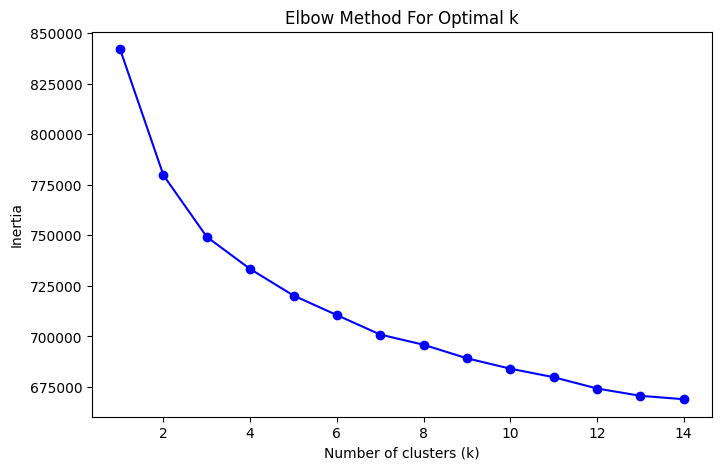

In [260]:
# Features (all user ratings per movie)
Xratings = csr_ratings.toarray()
X = np.hstack((Xratings, genre_matrix * 0.5))

# Scale the data
scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)

# Elbow method
inertia = []
K = range(1, 15)  # test k=1 to 14

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(Xscaled)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal k")
plt.show()

# in the elbow method we got 4, but we will take 20 clusters to have more granular clusters

In [261]:
bestK = 20  # (replace with your elbow choice)
kmeans = KMeans(n_clusters=bestK, random_state=42, n_init=10)
clusters = kmeans.fit_predict(Xscaled)

# Add clusters to dataset
final_dataset['cluster'] = clusters

In [262]:
final_dataset.head()

userId,movieId,1,4,6,7,10,11,15,16,17,...,601,602,603,604,605,606,607,608,610,cluster
0,1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0,7
1,2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,13
2,3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0
3,5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0
4,6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0,12


# Create the function for recommending movies

In [263]:
def get_movie_recommendation(movie_name):
    n_movies_to_recommend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]
    
    if len(movie_list):
        movie_idx = movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        
        # Find the cluster of the given movie
        movie_cluster = kmeans.labels_[movie_idx]
        
        # Get all movies in the same cluster
        cluster_movies_idx = [i for i, label in enumerate(kmeans.labels_) if label == movie_cluster and i != movie_idx]
        
        # Pick top N movies from this cluster (optionally, you can sort by similarity)
        recommend_frame = []
        for idx in cluster_movies_idx[:n_movies_to_recommend]:
            movie_id = final_dataset.iloc[idx]['movieId']
            title = movies[movies['movieId'] == movie_id]['title'].values[0]
            recommend_frame.append({'Title': title})
        
        df = pd.DataFrame(recommend_frame, index=range(1, n_movies_to_recommend+1))
        return df
    else:
        return "No movies found. Please check your input"


# Test the model by recommending similar movies

In [264]:
get_movie_recommendation('Toy Story')

,Title
1,Die Hard (1988)
2,E.T. the Extra-Terrestrial (1982)
3,"Princess Bride, The (1987)"
4,Aliens (1986)
5,Alien (1979)
6,"Terminator, The (1984)"
7,Groundhog Day (1993)
8,Back to the Future (1985)
9,Indiana Jones and the Last Crusade (1989)
10,"Fifth Element, The (1997)"


In [265]:
get_movie_recommendation('Iron Man')

,Title
1,X-Men (2000)
2,Shrek (2001)
3,"Monsters, Inc. (2001)"
4,Harry Potter and the Sorcerer's Stone (a.k.a. ...
5,Ocean's Eleven (2001)
6,"Beautiful Mind, A (2001)"
7,Ice Age (2002)
8,Spider-Man (2002)
9,"Bourne Identity, The (2002)"
10,Minority Report (2002)
